<table class="tfo-notebook-buttons" align="left">
<td style="border: none;">
<a target="blank" href="https://colab.research.google.com/github/Hari31416/Portfolio/blob/main/ML/Housing_Price/EDA_Feature_Engineering.ipynb?hl=en"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" width="28" height="28"/>Run on Google Colab</a></td>
<td style="border: none;">
<a target="blank" href="https://github.com/Hari31416/Portfolio/blob/main/Housing_Price/ML/EDA_Feature_Engineering.ipynb"><img src="https://cdn.icon-icons.com/icons2/2368/PNG/512/github_logo_icon_143772.png" width="28" height="28"/>View on Github</a></td>
<td style="border: none;">
</table>

## Content
1. [Imports](#Imports)
2. [Data Field](#data-fields)
    - [Getting More Information about Data Field](#more-info)
3. [Load Data](#load-data)
    - [Priliminary Analysis](#preliminary-analysis)
4. [Numeric Columns](#num-columns)
    - [OverallQual](#overallqual)
    - [GrLivArea](#grlivarea)

<a id="Imports"></a>
## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
mpl.rcParams['figure.figsize'] = (12, 8)
mpl.rcParams['font.size'] = 14
mpl.rc('font', family='serif')
sns.set_theme(style="white")

<a name="data-fields"></a>

## Data Fields

Here's a brief version of what you'll find in the data description file.

<ul>
<li><strong>SalePrice</strong> - the property's sale price in dollars. This is the target variable that you're trying to predict.</li>
<li><strong>MSSubClass</strong>: The building class</li>
<li><strong>MSZoning</strong>: The general zoning classification</li>
<li><strong>LotFrontage</strong>: Linear feet of street connected to property</li>
<li><strong>LotArea</strong>: Lot size in square feet</li>
<li><strong>Street</strong>: Type of road access</li>
<li><strong>Alley</strong>: Type of alley access</li>
<li><strong>LotShape</strong>: General shape of property</li>
<li><strong>LandContour</strong>: Flatness of the property</li>
<li><strong>Utilities</strong>: Type of utilities available</li>
<li><strong>LotConfig</strong>: Lot configuration</li>
<li><strong>LandSlope</strong>: Slope of property</li>
<li><strong>Neighborhood</strong>: Physical locations within Ames city limits</li>
<li><strong>Condition1</strong>: Proximity to main road or railroad</li>
<li><strong>Condition2</strong>: Proximity to main road or railroad (if a second is present)</li>
<li><strong>BldgType</strong>: Type of dwelling</li>
<li><strong>HouseStyle</strong>: Style of dwelling</li>
<li><strong>OverallQual</strong>: Overall material and finish quality</li>
<li><strong>OverallCond</strong>: Overall condition rating</li>
<li><strong>YearBuilt</strong>: Original construction date</li>
<li><strong>YearRemodAdd</strong>: Remodel date</li>
<li><strong>RoofStyle</strong>: Type of roof</li>
<li><strong>RoofMatl</strong>: Roof material</li>
<li><strong>Exterior1st</strong>: Exterior covering on house</li>
<li><strong>Exterior2nd</strong>: Exterior covering on house (if more than one material)</li>
<li><strong>MasVnrType</strong>: Masonry veneer type</li>
<li><strong>MasVnrArea</strong>: Masonry veneer area in square feet</li>
<li><strong>ExterQual</strong>: Exterior material quality</li>
<li><strong>ExterCond</strong>: Present condition of the material on the exterior</li>
<li><strong>Foundation</strong>: Type of foundation</li>
<li><strong>BsmtQual</strong>: Height of the basement</li>
<li><strong>BsmtCond</strong>: General condition of the basement</li>
<li><strong>BsmtExposure</strong>: Walkout or garden level basement walls</li>
<li><strong>BsmtFinType1</strong>: Quality of basement finished area</li>
<li><strong>BsmtFinSF1</strong>: Type 1 finished square feet</li>
<li><strong>BsmtFinType2</strong>: Quality of second finished area (if present)</li>
<li><strong>BsmtFinSF2</strong>: Type 2 finished square feet</li>
<li><strong>BsmtUnfSF</strong>: Unfinished square feet of basement area</li>
<li><strong>TotalBsmtSF</strong>: Total square feet of basement area</li>
<li><strong>Heating</strong>: Type of heating</li>
<li><strong>HeatingQC</strong>: Heating quality and condition</li>
<li><strong>CentralAir</strong>: Central air conditioning</li>
<li><strong>Electrical</strong>: Electrical system</li>
<li><strong>1stFlrSF</strong>: First Floor square feet</li>
<li><strong>2ndFlrSF</strong>: Second floor square feet</li>
<li><strong>LowQualFinSF</strong>: Low quality finished square feet (all floors)</li>
<li><strong>GrLivArea</strong>: Above grade (ground) living area square feet</li>
<li><strong>BsmtFullBath</strong>: Basement full bathrooms</li>
<li><strong>BsmtHalfBath</strong>: Basement half bathrooms</li>
<li><strong>FullBath</strong>: Full bathrooms above grade</li>
<li><strong>HalfBath</strong>: Half baths above grade</li>
<li><strong>Bedroom</strong>: Number of bedrooms above basement level</li>
<li><strong>Kitchen</strong>: Number of kitchens</li>
<li><strong>KitchenQual</strong>: Kitchen quality</li>
<li><strong>TotRmsAbvGrd</strong>: Total rooms above grade (does not include bathrooms)</li>
<li><strong>Functional</strong>: Home functionality rating</li>
<li><strong>Fireplaces</strong>: Number of fireplaces</li>
<li><strong>FireplaceQu</strong>: Fireplace quality</li>
<li><strong>GarageType</strong>: Garage location</li>
<li><strong>GarageYrBlt</strong>: Year garage was built</li>
<li><strong>GarageFinish</strong>: Interior finish of the garage</li>
<li><strong>GarageCars</strong>: Size of garage in car capacity</li>
<li><strong>GarageArea</strong>: Size of garage in square feet</li>
<li><strong>GarageQual</strong>: Garage quality</li>
<li><strong>GarageCond</strong>: Garage condition</li>
<li><strong>PavedDrive</strong>: Paved driveway</li>
<li><strong>WoodDeckSF</strong>: Wood deck area in square feet</li>
<li><strong>OpenPorchSF</strong>: Open porch area in square feet</li>
<li><strong>EnclosedPorch</strong>: Enclosed porch area in square feet</li>
<li><strong>3SsnPorch</strong>: Three season porch area in square feet</li>
<li><strong>ScreenPorch</strong>: Screen porch area in square feet</li>
<li><strong>PoolArea</strong>: Pool area in square feet</li>
<li><strong>PoolQC</strong>: Pool quality</li>
<li><strong>Fence</strong>: Fence quality</li>
<li><strong>MiscFeature</strong>: Miscellaneous feature not covered in other categories</li>
<li><strong>MiscVal</strong>: $Value of miscellaneous feature</li>
<li><strong>MoSold</strong>: Month Sold</li>
<li><strong>YrSold</strong>: Year Sold</li>
<li><strong>SaleType</strong>: Type of sale</li>
<li><strong>SaleCondition</strong>: Condition of sale</li>
</ul>

<a name='more-info'></a>

### Getting More Details

Here we'll create a function which returns details about the column, given the column name.

In [3]:
def get_detail(column):
    """ Get the detail of the column 
    
    Args:
        column (str): the column name
    
    Returns:
        str: the detail of the column
    """
    text = ""
    with open("data_description.txt") as f:
        text = f.read()
    
    try:
        start = text.find(f"{column}:")
        end = text.find(":", start+len(column)+5)
        texts_found = text[start:end].strip().split("\n")
        print("\n".join(texts_found[:-2]))
    except:
        print("No such column")

In [4]:
get_detail("Neighborhood")

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker


<a name = "load-data"></a>
## Loading the Data

In [5]:
test = pd.read_csv(r'data\test_cleaned.csv')
train = pd.read_csv(r'data\train_cleaned.csv')

<a id = "preliminary-analysis"></a>

### Priliminary Analysis

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

There are about 80 features in the dataset. It is impossible to visualize every single of them. That's why we'll visualize and analyze only a few of them.

In [6]:
str_cols = train.select_dtypes(include=['object']).columns
num_cols = train.select_dtypes(exclude=['object']).columns

In [8]:
str_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [9]:
num_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [7]:
correlation = train.corr()["SalePrice"].sort_values(ascending=False)
correlation = correlation.drop(["SalePrice", "Id"])
correlation

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.347718
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [8]:
px.bar(x=correlation.index, y=correlation.values, color=correlation.values,
       title="Correlation between features and SalePrice",
       color_continuous_scale="viridis",)

We'll use a correlation matrix to see which features are highly correlated with `SalePrice`.
These columns are `OverallQual`, `GrLivArea`, `GarageCars` etc.. The reason for this is obvious. We also have some columns which are highly correlated with `SalePrice` in a negative way like `KitchenAbvGr`, `EnclosedPorch` etc.. We will give more attention to all these columns.

What about the non-numeric columns? Well, we can't directly see how correlated they are with `SalePrice`. So, we have to use some different methods. Let's get started.

<a id="num-columns"></a>
## Numeric Columns

The list of numeric columns is given below.

In [12]:
num_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

The highly correlated columns are:

In [13]:
correlation.index

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF',
       '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'GarageYrBlt',
       'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 'PoolArea',
       'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal',
       'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass', 'EnclosedPorch',
       'KitchenAbvGr'],
      dtype='object')

<a id="overallqual"></a>
### OverallQual

In [14]:
get_detail("OverallQual")

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor


No wonder this column is highly correlated with `SalePrice`.

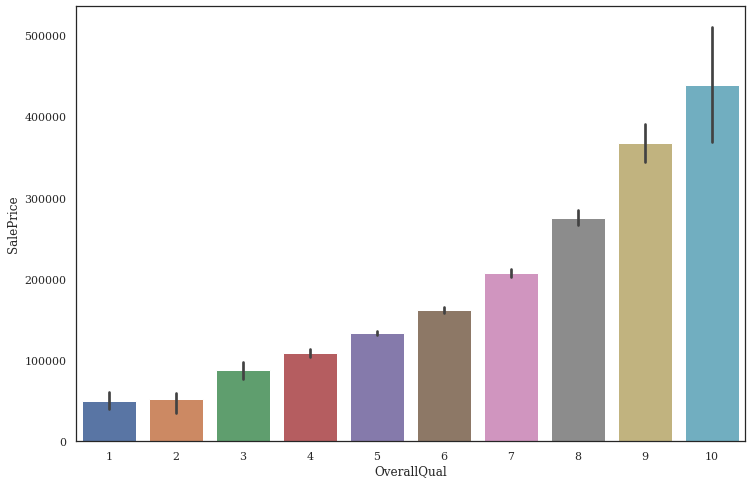

In [35]:
sns.barplot(x="OverallQual", y="SalePrice", data=train);

In [21]:
px.box(train, x="OverallQual", y="SalePrice", color="OverallQual",
       title="SalePrice by OverallQual", width=800, height=600)

The `SalePrice` is increasing with the `OverallQual`, for obvious reasons. The plot also shows that there are some outliers.

<a id="grlivarea"></a>
### GrLivArea

In [26]:
get_detail("GrLivArea")

GrLivArea: Above grade (ground) living area square feet


In [50]:
px.scatter(train, x="GrLivArea", y="SalePrice")

Again a linear relationship with the target variable. We also have some outliers.

<a id="garagecars"></a>
### GarageCars

In [9]:
get_detail("GarageCars")

GarageCars: Size of garage in car capacity


In [11]:
px.box(train, x="GarageCars", y="SalePrice")

People prefer to have a garage with 3 cars.

<a id="garagearea"></a>
### GarageArea

<a id = "data-cleaning"></a>

In [32]:
px.histogram(train, x="GarageArea", nbins=30, title="SalePrice by GarageArea")

There are 81 houses with no garage. The average garage area is about 500 square feet.

<a id="totalbsmtsf"></a>
### TotalBsmtSF

In [36]:
px.scatter(train, x="TotalBsmtSF", y="SalePrice")

A strong correlation! Again, we see some outliers, specially to the right corner where a house has a basement with a lot of square feet and still was sold just for $160K.

<a id="1stflrsf"></a>
### 1stFlrSF

In [38]:
px.scatter(train, x="1stFlrSF", y="SalePrice")

We see the same outlier here. 

In [42]:
px.histogram(train, x="1stFlrSF", nbins=30, title="SalePrice by 1stFlrSF")

This is getting repetitive. Let's move on to the non-numeric columns.

<a id="non-numeric"></a>
## Non-Numeric Columns

In [43]:
str_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Again, a huge number of columns. We'll be visualizing just a few of them.

In [44]:
get_detail("MSZoning")

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
